In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

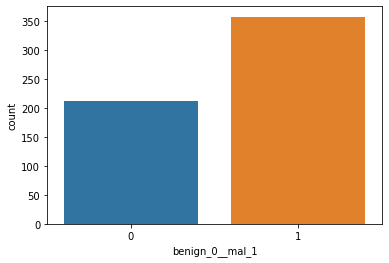

In [10]:
sns.countplot(x = 'benign_0__mal_1', data = df)

<AxesSubplot:>

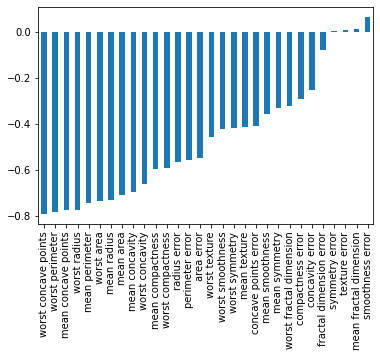

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

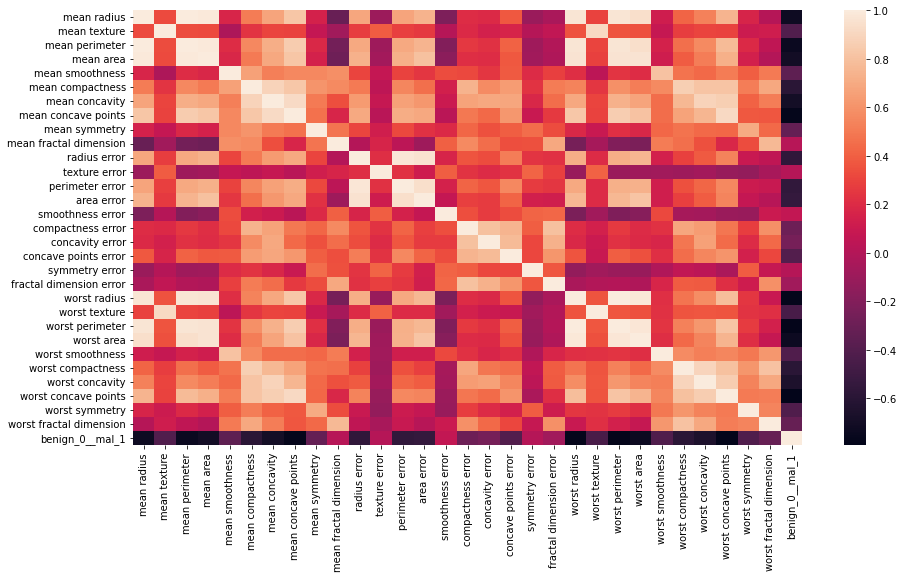

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())

In [97]:
X = df.drop('benign_0__mal_1', axis = 1).values
y=df['benign_0__mal_1'].values

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()

In [102]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
from tensorflow.keras.models import Sequential

In [104]:
from tensorflow.keras.layers import Dense, Dropout

In [105]:
model = Sequential()

In [47]:
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [48]:
model.fit(x=X_train, y = y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 17ms/step - loss: 0.6680 - val_loss: 0.6436
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6196 - val_loss: 0.6073
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5832 - val_loss: 0.5736
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5516 - val_loss: 0.5470
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5173 - val_loss: 0.5183
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4916 - val_loss: 0.5042
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4711 - val_loss: 0.4653
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4512 - val_loss: 0.4719
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4572 - val_loss: 0.4409
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3957 - val_loss: 0.4169
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1237 - val_loss: 0.1615
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1238 - val_loss: 0.1623
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1237 - val_loss: 0.1621
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1238 - val_loss: 0.1620
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1237 - val_loss: 0.1635
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1240 - val_loss: 0.1628
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1245 - val_loss: 0.1635
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1239 - val_loss: 0.1622
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1236 - val_loss: 0.1618
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1236 - val_loss: 0.1616
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.1236 - val_loss: 0.1622
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1241 - val_loss: 0.1620
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1237 - val_loss: 0.1626
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1235 - val_loss: 0.1624
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1235 - val_loss: 0.1624
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1238 - val_loss: 0.1623
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1236 - val_loss: 0.1624
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1237 - val_loss: 0.1621
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1240 - val_loss: 0.1630
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1237 - val_loss: 0.1625
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.1104 - val_loss: 0.1040
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1100 - val_loss: 0.1040
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1102 - val_loss: 0.1050
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1096 - val_loss: 0.1038
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1090 - val_loss: 0.1047
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1088 - val_loss: 0.1071
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1091 - val_loss: 0.1061
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1090 - val_loss: 0.1044
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1082 - val_loss: 0.1041
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1079 - val_loss: 0.1050
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.1034 - val_loss: 0.1080
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1034 - val_loss: 0.1126
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1040 - val_loss: 0.1121
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1034 - val_loss: 0.1082
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1028 - val_loss: 0.1093
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1027 - val_loss: 0.1088
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1029 - val_loss: 0.1090
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1027 - val_loss: 0.1087
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1028 - val_loss: 0.1086
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1024 - val_loss: 0.1102
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.1022 - val_loss: 0.1125
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1021 - val_loss: 0.1134
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1020 - val_loss: 0.1136
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1025 - val_loss: 0.1124
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1019 - val_loss: 0.1129
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1020 - val_loss: 0.1130
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1023 - val_loss: 0.1144
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1020 - val_loss: 0.1136
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1041 - val_loss: 0.1152
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1020 - val_loss: 0.1132
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.1023 - val_loss: 0.1146
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1017 - val_loss: 0.1160
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1020 - val_loss: 0.1166
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1019 - val_loss: 0.1161
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1017 - val_loss: 0.1155
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1020 - val_loss: 0.1156
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1021 - val_loss: 0.1159
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1025 - val_loss: 0.1167
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1025 - val_loss: 0.1147
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1021 - val_loss: 0.1178
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.1021 - val_loss: 0.1180
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1015 - val_loss: 0.1171
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1024 - val_loss: 0.1164
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1021 - val_loss: 0.1195
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1023 - val_loss: 0.1178
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1014 - val_loss: 0.1197
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1019 - val_loss: 0.1183
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1028 - val_loss: 0.1206
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1032 - val_loss: 0.1173
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1023 - val_loss: 0.1199
Epoc

In [49]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

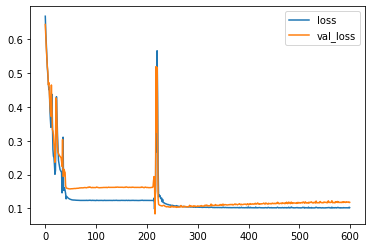

In [50]:
losses.plot()

In [106]:
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(rate=0.4))

model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [107]:
from tensorflow.keras.callbacks import EarlyStopping

In [108]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 25)

In [109]:
model.fit(x=X_train, y = y_train, epochs=600, validation_data=(X_test, y_test), 
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.7129 - val_loss: 0.6723
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6891 - val_loss: 0.6495
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6550 - val_loss: 0.6267
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6373 - val_loss: 0.5958
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6110 - val_loss: 0.5581
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5819 - val_loss: 0.5120
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5474 - val_loss: 0.4605
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5038 - val_loss: 0.4125
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4669 - val_loss: 0.3644
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4514 - val_loss: 0.3291
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.1042 - val_loss: 0.0559
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0971 - val_loss: 0.0494
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0992 - val_loss: 0.0484
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1006 - val_loss: 0.0499
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0927 - val_loss: 0.0486
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1041 - val_loss: 0.0541
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0869 - val_loss: 0.0493
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0961 - val_loss: 0.0513
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0875 - val_loss: 0.0620
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0848 - val_loss: 0.0519
Epoch 93/600


<AxesSubplot:>

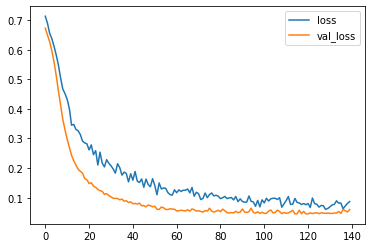

In [110]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [111]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [112]:
print(predictions)

[[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]]


In [113]:
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        54
           1       0.99      0.97      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[53  1]
 [ 3 86]]
